# Temperature Forecast Project


Data Description

importing required libraries.



In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the dataset.



In [193]:
df=pd.read_csv('temperature.csv')

In [194]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [198]:
df.shape   # checking data dimension

(7752, 25)

In [199]:
pd.set_option('display.max_rows',None) #shows all rows data

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Checking Null Values

In [157]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [201]:
df.dropna(inplace=True)

In [202]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [204]:
df['month']=pd.to_datetime(df['Date']).dt.month

In [205]:
df['year']=pd.to_datetime(df['Date']).dt.year

In [206]:
df.head(3)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,year
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,2013
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,2013
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,2013


In [207]:
df['month'].value_counts()

7     2584
8     2446
6      360
1      249
4      248
3      247
9      247
12     247
11     246
2      246
5      246
10     222
Name: month, dtype: int64

In [208]:
df['year'].value_counts()

2014    1547
2015    1533
2013    1510
2017    1506
2016    1492
Name: year, dtype: int64

In [209]:
df.drop('Date',axis=1,inplace=True)

In [210]:
df.head(2)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,2013


In [211]:
df.shape

(7588, 26)

In [169]:
pd.set_option('display.max_columns',None)

Statistical summary. 

In [212]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,year
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,7.068134,2014.991697
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,2.242389,1.410877
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,1.000000,2013.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,7.000000,2015.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,12.000000,2017.000000


correlation matrix

In [213]:
corr=df.corr()

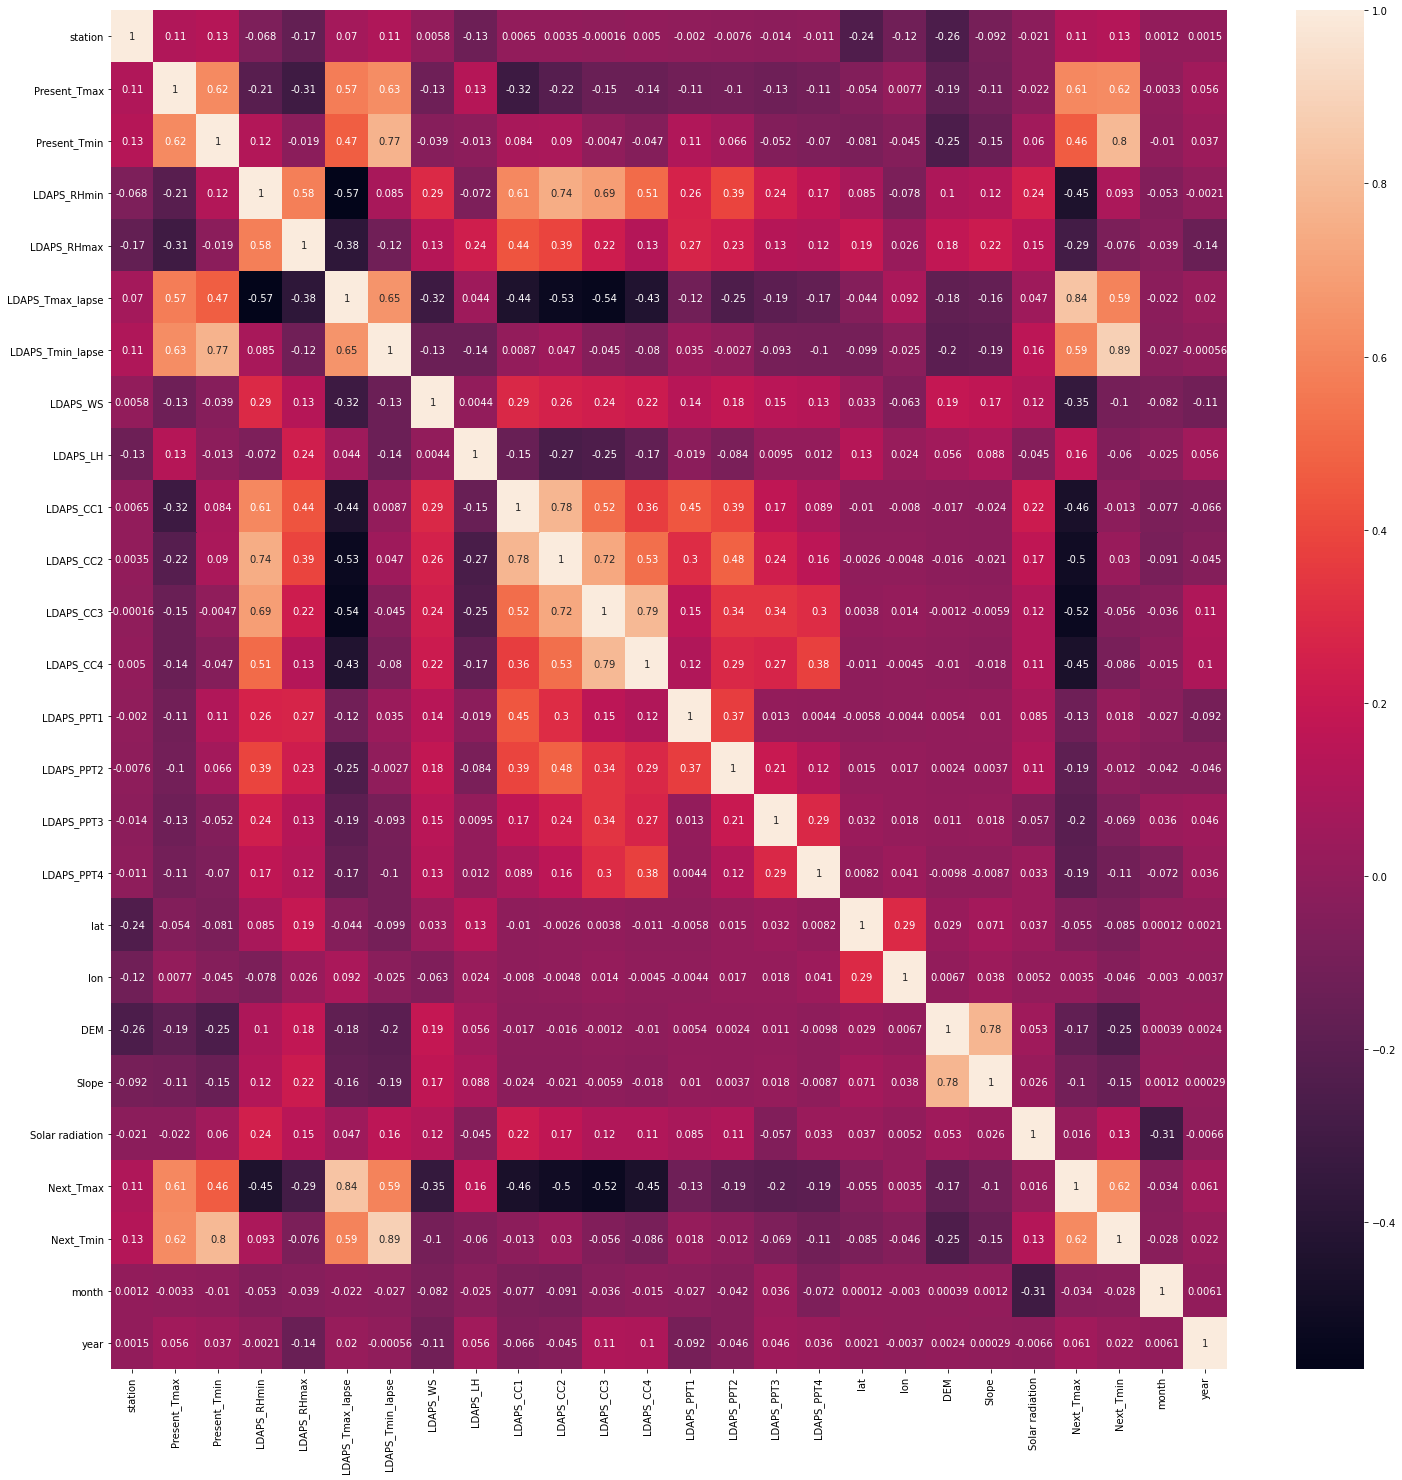

In [214]:
plt.figure(figsize=(25,25))
sns.heatmap(corr,color='blue',annot=True)
plt.show()

In [174]:
corr['Next_Tmax'].sort_values(ascending=True)

LDAPS_CC3          -0.523061
LDAPS_CC2          -0.498295
LDAPS_CC1          -0.459705
LDAPS_CC4          -0.454039
LDAPS_RHmin        -0.446824
LDAPS_WS           -0.351107
LDAPS_RHmax        -0.289788
LDAPS_PPT3         -0.203554
LDAPS_PPT4         -0.190720
LDAPS_PPT2         -0.186722
DEM                -0.174578
LDAPS_PPT1         -0.125954
Slope              -0.104279
lat                -0.055367
month              -0.033684
lon                 0.003502
Solar radiation     0.016145
year                0.061211
station             0.107747
LDAPS_LH            0.156779
Present_Tmin        0.463523
LDAPS_Tmin_lapse    0.592119
Present_Tmax        0.610357
Next_Tmin           0.616629
LDAPS_Tmax_lapse    0.835729
Next_Tmax           1.000000
Name: Next_Tmax, dtype: float64

In [175]:
corr['Next_Tmin'].sort_values(ascending=True)

DEM                -0.249303
Slope              -0.148379
LDAPS_PPT4         -0.114900
LDAPS_WS           -0.102021
LDAPS_CC4          -0.086197
lat                -0.085136
LDAPS_RHmax        -0.076415
LDAPS_PPT3         -0.068664
LDAPS_LH           -0.060392
LDAPS_CC3          -0.056490
lon                -0.045758
month              -0.028344
LDAPS_CC1          -0.012877
LDAPS_PPT2         -0.012462
LDAPS_PPT1          0.018031
year                0.021617
LDAPS_CC2           0.030358
LDAPS_RHmin         0.093249
Solar radiation     0.125517
station             0.128184
LDAPS_Tmax_lapse    0.589963
Next_Tmax           0.616629
Present_Tmax        0.621048
Present_Tmin        0.796975
LDAPS_Tmin_lapse    0.886513
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

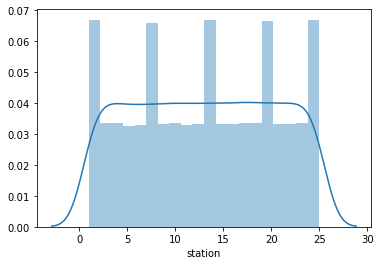

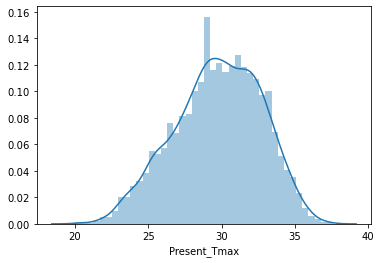

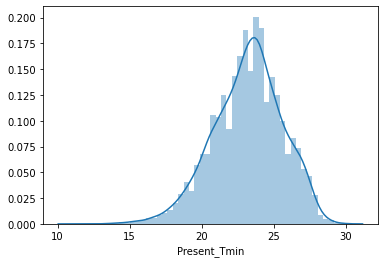

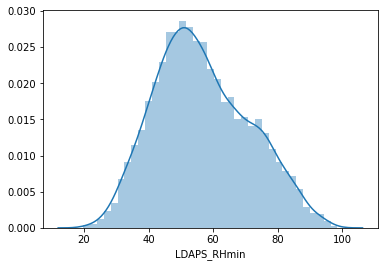

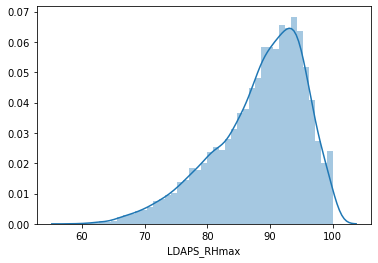

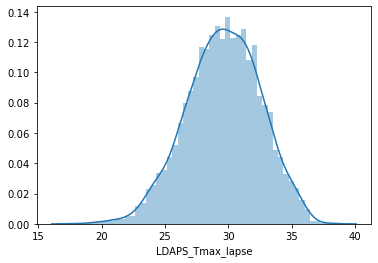

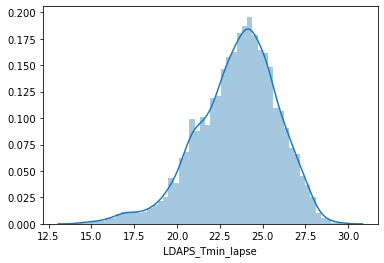

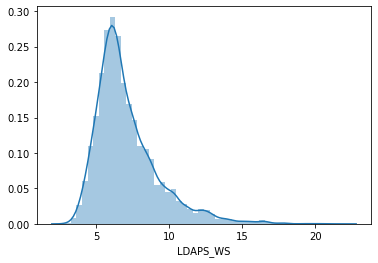

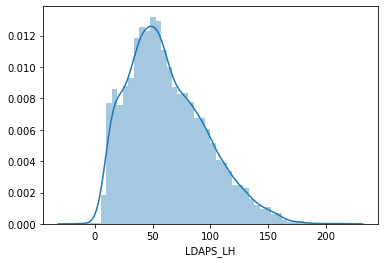

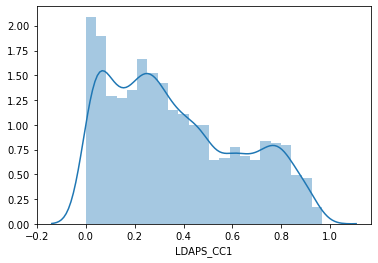

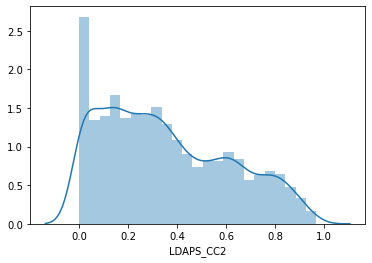

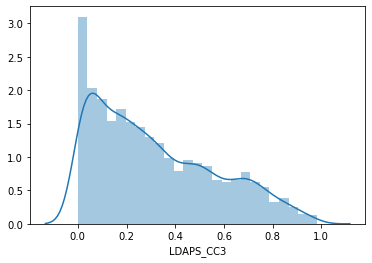

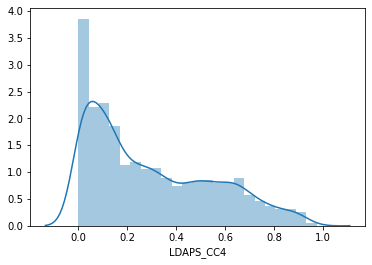

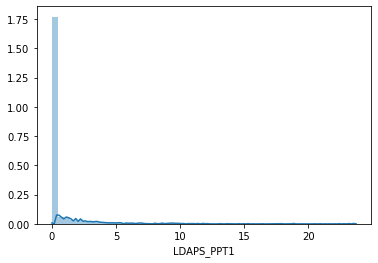

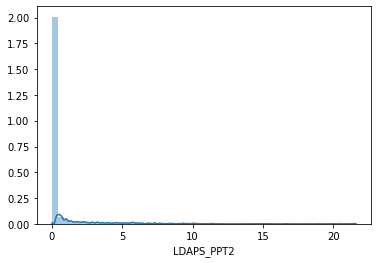

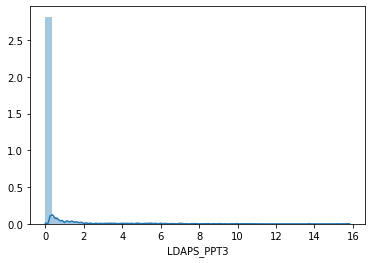

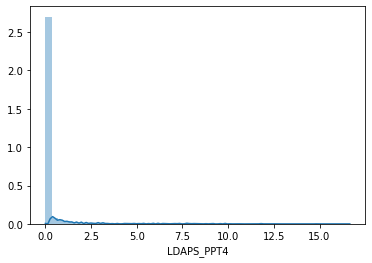

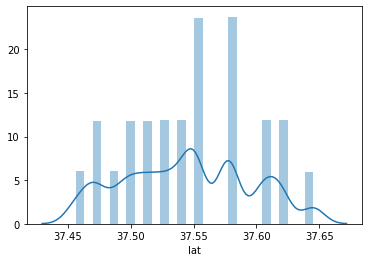

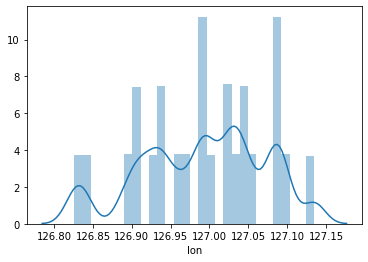

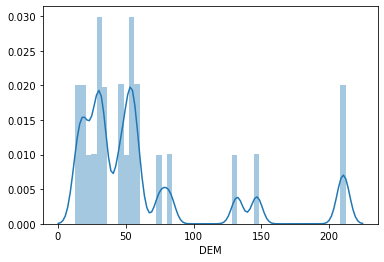

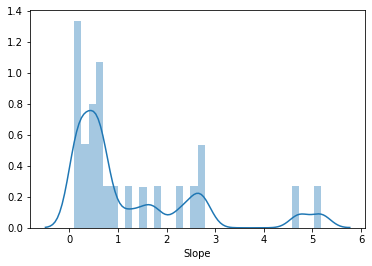

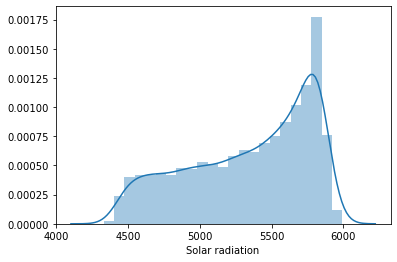

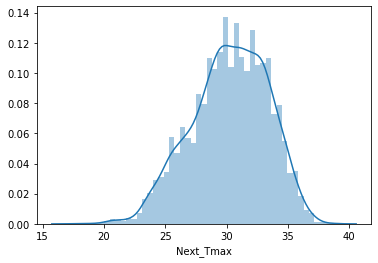

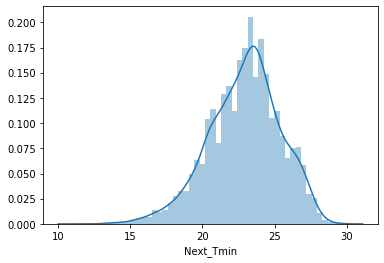

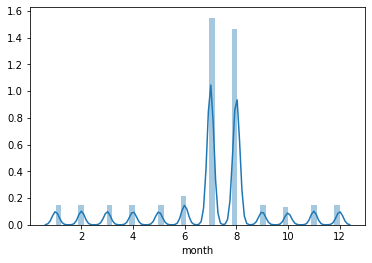

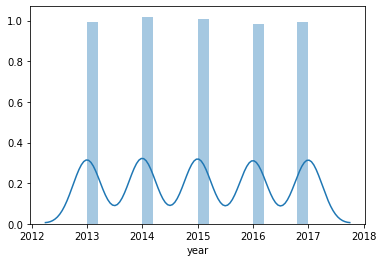

In [215]:
for i in df.describe().columns:
    sns.distplot(df[i].dropna())
    plt.show()

In [216]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
month              -0.703092
year                0.013575
dtype: float64

In [217]:
from sklearn.preprocessing import power_transform

In [218]:
df['LDAPS_RHmax']=power_transform(df['LDAPS_RHmax'].values.reshape(-1,1))
df['LDAPS_WS']=power_transform(df['LDAPS_WS'].values.reshape(-1,1))
df['LDAPS_PPT1']=power_transform(df['LDAPS_PPT1'].values.reshape(-1,1))
df['LDAPS_PPT2']=power_transform(df['LDAPS_PPT2'].values.reshape(-1,1))
df['LDAPS_PPT3']=power_transform(df['LDAPS_PPT3'].values.reshape(-1,1))
df['LDAPS_PPT4']=power_transform(df['LDAPS_PPT4'].values.reshape(-1,1))
df['DEM']=power_transform(df['DEM'].values.reshape(-1,1))
df['Slope']=power_transform(df['Slope'].values.reshape(-1,1))

Splitting the data into dependent and independent variables. 

In [219]:
x=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=df[['Next_Tmax','Next_Tmin']]

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [221]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=54)

In [222]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [223]:
lr=LinearRegression()
dr=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [224]:
model=[lr,dr,rf]

In [225]:
import numpy as np

In [226]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=34)
    m.fit(x_train,y_train)
    predv=m.predict(x_test)
    print('r2_score of',m,'is:')
    print(r2_score(y_test,predv))
    print('mean_squared_error:',mean_squared_error(y_test,predv))
    print('mean_absolute_error:',mean_absolute_error(y_test,predv))
    print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predv)))
    print('\n')

r2_score of LinearRegression() is:
0.8107014528687518
mean_squared_error: 1.588569514243623
mean_absolute_error: 0.9476708238448474
root_mean_squared_error 1.260384669156057


r2_score of DecisionTreeRegressor() is:
0.7843259014427102
mean_squared_error: 1.7540777338603453
mean_absolute_error: 0.9556214317083866
root_mean_squared_error 1.3244159972834613


r2_score of RandomForestRegressor() is:
0.9046169457538124
mean_squared_error: 0.7699148945981552
mean_absolute_error: 0.6597465963987708
root_mean_squared_error 0.8774479440959191




Crosss Validation

In [228]:
from sklearn.model_selection import cross_val_score


In [229]:
lrs=cross_val_score(lr,x,y,scoring='r2',cv=5)
print('LinearRegression cross_val_score:',lrs.mean())

LinearRegression cross_val_score: 0.7313631308389447


In [230]:
drs=cross_val_score(dr,x,y,scoring='r2',cv=5) 
print('DecisionTreeRegressor cross_val_score:',drs.mean())

DecisionTreeRegressor cross_val_score: 0.457612948309872


In [231]:
rfr=cross_val_score(rf,x,y,scoring='r2',cv=5)     
print('RandomforestRegressor cross_val_score:',rfr.mean())

RandomforestRegressor cross_val_score: 0.7170019322398795


In [232]:
import joblib


In [233]:
joblib.dump(rf,'temp.obj')

['temp.obj']